# Crime Rate vs Educational Attainment
---
Is there a correlation between Crime Rate and Educational Attainment? If so, investing more resources on improving schools and engaging students in achieving higher education levels can contribute to save money in controlling crime thru a police force and maintain correctional systems. Intuitively this seems true but is there any data confirming this statement?

## Crime Rate

First, we will load Crime Rate data obtained from the United Nations Statistics Division (__http://data.un.org/_Docs/SYB/CSV/SYB62_T12_201904_Intentional%20homicides%20and%20Other%20Crimes.csv__) into a pandas dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

filename = os.path.join('Resources', 'SYB62_T12_201904_Intentional homicides and Other Crimes.csv')
crime_df = pd.read_csv(filename, encoding='ISO-8859-1', skiprows=1, thousands=',')
crime_df.rename(columns={'Region/Country/Area': 'Region/Country/Area ID',
                         'Unnamed: 1': 'Region/Country/Area'}, inplace=True)
crime_df = crime_df[6:]            # remove data per region and just keep data per country
crime_df.rename(columns={'Region/Country/Area ID': 'Country ID',
                         'Region/Country/Area': 'Country'}, inplace=True)
crime_df['Series'].value_counts()  # count of data records per unique 'Series' value

Intentional homicide rates per 100,000                                763
Percentage of male and female intentional homicide victims, Male      466
Percentage of male and female intentional homicide victims, Female    466
Robbery at the national level, rate per 100,000 population            456
Theft at the national level, rate per 100,000 population              456
Assault rate per 100,000 population                                   441
Kidnapping at the national level, rate per 100,000                    410
Total Sexual Violence at the national level, rate per 100,000         308
Name: Series, dtype: int64

In [2]:
# after inspecting the data above, it seems that intentional homicide rates per 100,000 is measured
# in most of the countries... we will use that to 

# crime_df.pivot(index='Country', columns='Series', values='Value')
crime_df_2010 = crime_df[crime_df['Year']==2010]
crime_df_2010.pivot(index='Country', columns='Series', values='Value')#.dropna(axis='index')

Series,"Assault rate per 100,000 population","Intentional homicide rates per 100,000","Kidnapping at the national level, rate per 100,000","Percentage of male and female intentional homicide victims, Female","Percentage of male and female intentional homicide victims, Male","Robbery at the national level, rate per 100,000 population","Theft at the national level, rate per 100,000 population","Total Sexual Violence at the national level, rate per 100,000"
Country,,,,,,,,
Afghanistan,NaN,3.4,NaN,NaN,NaN,NaN,NaN,NaN
Albania,6.1,4.3,0.3,1.3,7.3,8.0,135.3,2.7
Algeria,114.6,0.7,0.5,NaN,NaN,51.2,141.4,10.5
American Samoa,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,116.0,NaN,NaN,0.0,0.0,9.5,1322.7,11.9
Antigua and Barbuda,NaN,6.3,NaN,NaN,NaN,NaN,NaN,NaN
Armenia,5.4,1.9,1.4,0.7,3.4,12.4,127.3,2.8
Aruba,NaN,3.9,NaN,0.0,8.3,NaN,NaN,NaN
Australia,310.4,1.0,2.8,0.8,1.2,66.2,2157.6,85.1


## Educational Attainment

In this step, we will load educational data per country from the United Nations Statistics Division (__http://data.un.org/_Docs/SYB/CSV/SYB62_T07_Education.csv__) into a pandas dataframe.

In [3]:
filename = os.path.join('Resources', 'SYB62_T07_Education.csv')
education_df = pd.read_csv(filename, encoding='ISO-8859-1', skiprows=1)
education_df.rename(columns={'Region/Country/Area': 'Region/Country/Area ID',
                             'Unnamed: 1': 'Region/Country/Area'}, inplace=True)
education_df[education_df['Region/Country/Area'] == 'Afghanistan'] # this will tell me when data per country starts
education_df = education_df[495:]      # remove data per region and just keep data per country
education_df.rename(columns={'Region/Country/Area ID': 'Country ID',
                         'Region/Country/Area': 'Country'}, inplace=True)
education_df['Series'].value_counts()  # count of data records per unique 'Series' value

Students enrolled in primary education (thousands)      1096
Gross enrollement ratio - Primary (male)                1007
Gross enrollment ratio - Primary (female)               1007
Students enrolled in secondary education (thousands)     953
Gross enrollment ratio - Secondary (male)                871
Gross enrollment ratio - Secondary (female)              871
Students enrolled in tertiary education (thousands)      835
Gross enrollment ratio - Tertiary (male)                 748
Gross enrollment ratio - Tertiary (female)               745
Name: Series, dtype: int64

## Population

In this step, we will load population data per country from the United Nations Statistics Division (__http://data.un.org/_Docs/SYB/CSV/SYB61_T02_Population,%20Surface%20Area%20and%20Density.csv__) into a pandas dataframe.

In [4]:
filename = os.path.join('Resources', 'SYB61_T02_Population, Surface Area and Density.csv')
population_df = pd.read_csv(filename, encoding='ISO-8859-1', skiprows=1, thousands=',')
population_df.rename(columns={'Region/Country/Area': 'Region/Country/Area ID',
                             'Unnamed: 1': 'Region/Country/Area'}, inplace=True)
population_df[population_df['Region/Country/Area'] == 'Afghanistan'] # this will tell me when data per country starts
population_df = population_df[899:]      # remove data per region and just keep data per country
population_df.rename(columns={'Region/Country/Area ID': 'Country ID',
                              'Region/Country/Area': 'Country'}, inplace=True)
population_df['Series'].value_counts()  # count of data records per unique 'Series' value

Population density                                      983
Population mid-year estimates (millions)                983
Sex ratio (males per 100 females)                       901
Population aged 60+ years old (percentage)              875
Population aged 0 to 14 years old (percentage)          875
Population mid-year estimates for males (millions)      801
Population mid-year estimates for females (millions)    801
Surface area (thousand km2)                             232
Name: Series, dtype: int64

## Putting All Together

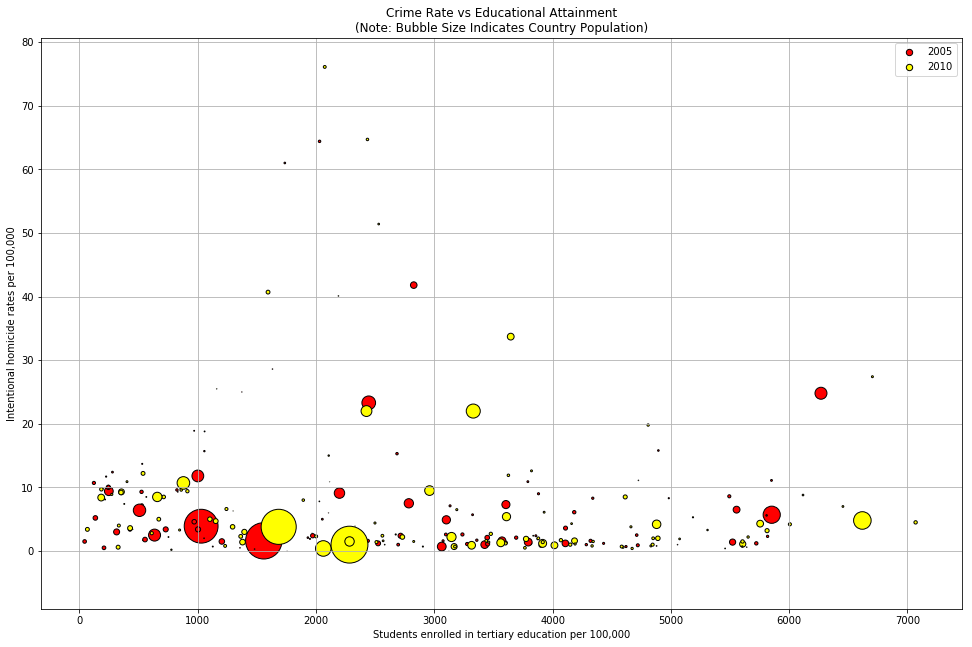

In [5]:
homicides_df = crime_df[crime_df['Series'] == 'Intentional homicide rates per 100,000']
homicides_df = homicides_df.loc[:, ['Country', 'Year', 'Value']]
homicides_df.rename(columns={'Value': 'Intentional homicide rates per 100,000'}, inplace=True)
homicides_df.set_index(['Country', 'Year'], inplace=True)

students_in_tertiary_df = education_df[education_df['Series'] == 'Students enrolled in tertiary education (thousands)']
students_in_tertiary_df = students_in_tertiary_df.loc[:, ['Country', 'Year', 'Value']]
students_in_tertiary_df.rename(columns={'Value': 'Students enrolled in tertiary education (thousands)'}, inplace=True)
students_in_tertiary_df.set_index(['Country', 'Year'], inplace=True)

estimated_population_df = population_df[population_df['Series'] == 'Population mid-year estimates (millions)']
estimated_population_df = estimated_population_df.loc[:, ['Country', 'Year', 'Value']]
estimated_population_df.rename(columns={'Value': 'Population mid-year estimates (millions)'}, inplace=True)
estimated_population_df.set_index(['Country', 'Year'], inplace=True)

summary_df = homicides_df.join(students_in_tertiary_df, how='inner')
summary_df = summary_df.join(estimated_population_df, how='inner')

summary_df['Students enrolled in tertiary education per 100,000'] = (
    100000*1000*summary_df['Students enrolled in tertiary education (thousands)'].replace(',','',regex=True).astype(float) / 
    (1000000*summary_df['Population mid-year estimates (millions)'].replace(',','',regex=True).astype(float))
    )
summary_df.reset_index(inplace=True)
summary_df['Year'].value_counts()  # it seems better to keep just 2010 and 2005 due to number of samples
summary_df = summary_df[(summary_df['Year'] == 2005) | (summary_df['Year'] == 2010)]
summary_df['Year'].value_counts()
fig, ax = plt.subplots()
ax.scatter(x=summary_df[summary_df['Year'] == 2005]['Students enrolled in tertiary education per 100,000'],
                      y=summary_df[summary_df['Year'] == 2005]['Intentional homicide rates per 100,000'],
                      s=summary_df[summary_df['Year'] == 2005]['Population mid-year estimates (millions)'],
                      color='red', marker='o', edgecolor='black', label='2005')
ax.scatter(x=summary_df[summary_df['Year'] == 2010]['Students enrolled in tertiary education per 100,000'],
                      y=summary_df[summary_df['Year'] == 2010]['Intentional homicide rates per 100,000'],
                      s=summary_df[summary_df['Year'] == 2010]['Population mid-year estimates (millions)'],
                      color='yellow', marker='o', edgecolor='black', label='2010')
ax.set_title('Crime Rate vs Educational Attainment\n(Note: Bubble Size Indicates Country Population)')
ax.set_xlabel('Students enrolled in tertiary education per 100,000')
ax.set_ylabel('Intentional homicide rates per 100,000')
lgnd = plt.legend(loc='upper right')
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
fig.set_size_inches(16.5, 10.5)
plt.grid()